# Code for each Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pydotplus
from IPython.display import Image
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.tree import export_graphviz
from sklearn import tree

from pipeline_utilities_v2 import model_generator


In [2]:
# Load in data
df = pd.read_csv('https://archive.ics.uci.edu/static/public/329/data.csv')
df.head()

quality  pre_screening  ma1  ma2  ma3  ma4  ma5  ma6   exudate1   exudate2  \
0        1              1   22   22   22   19   18   14  49.895756  17.775994   
1        1              1   24   24   22   18   16   13  57.709936  23.799994   
2        1              1   62   60   59   54   47   33  55.831441  27.993933   
3        1              1   55   53   53   50   43   31  40.467228  18.445954   
4        1              1   44   44   44   41   39   27  18.026254   8.570709   

    exudate3  exudate3.1  exudate5  exudate6  exudate7  exudate8  \
0   5.270920    0.771761  0.018632  0.006864  0.003923  0.003923   
1   3.325423    0.234185  0.003903  0.003903  0.003903  0.003903   
2  12.687485    4.852282  1.393889  0.373252  0.041817  0.007744   
3   9.118901    3.079428  0.840261  0.272434  0.007653  0.001531   
4   0.410381    0.000000  0.000000  0.000000  0.000000  0.000000   

   macula_opticdisc_distance  opticdisc_diameter  am_fm_classification  Class  
0                   0.486903            0.100025                     1      0  
1                   0.520908            0.144414                     0      0  
2                   0.530904            0.128548                     0      1  
3                   0.483284            0.114790                     0      0  
4                   0.475935            0.123572                     0      1

In [3]:
# Create X & Y variables 
df = df.rename(columns={'Class': 'y'})
X = df.drop('y', axis=1)
y = df['y']

In [4]:
# Split the data into training and testing sets using random_state=1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [5]:
# Scale the X data by using StandardScaler()
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[ 0.04819627,  0.28301966,  1.05103575, ...,  1.24596785,
         1.1000033 ,  1.40931159],
       [ 0.04819627, -3.53332351,  0.69936235, ..., -1.366194  ,
         1.54411068, -0.70956629],
       [ 0.04819627,  0.28301966, -0.82455572, ..., -1.20344515,
         0.35087711,  1.40931159],
       ...,
       [ 0.04819627,  0.28301966,  1.01196092, ...,  1.49140707,
         1.10539433, -0.70956629],
       [ 0.04819627,  0.28301966, -1.44975288, ..., -1.20351628,
         1.60710061, -0.70956629],
       [ 0.04819627,  0.28301966, -0.16028374, ..., -0.53932595,
         0.00857508,  1.40931159]])

In [6]:
# Transform the test dataset based on the fit from the training dataset
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.04819627,  0.28301966,  1.48085879, ..., -0.24021802,
         0.40932723, -0.70956629],
       [ 0.04819627,  0.28301966, -0.47288232, ...,  0.91534867,
        -0.93366347,  1.40931159],
       [ 0.04819627,  0.28301966,  1.83253219, ...,  0.85933261,
        -0.06536715, -0.70956629],
       ...,
       [ 0.04819627,  0.28301966,  0.66028752, ..., -1.44322941,
         0.35831106, -0.70956629],
       [ 0.04819627,  0.28301966, -0.82455572, ..., -0.70840551,
        -0.05946539,  1.40931159],
       [ 0.04819627, -3.53332351,  0.58213788, ...,  0.71692736,
        -0.23413477, -0.70956629]])

In [7]:
# Define Models
models = [("Logistic Regression", LogisticRegression()),
("Support Vector Machine", SVC()),
("K-Nearest Neighbors", KNeighborsClassifier()),
("Decision Tree", DecisionTreeClassifier()),
("Random Forest", RandomForestClassifier()),
("Extremely Random Trees", ExtraTreesClassifier()),
("Gradient Boosting", GradientBoostingClassifier()),
("AdaBoost", AdaBoostClassifier()),
("Naive Bayes", GaussianNB())]

model_scores = []

for name, model in models:
    pipe = Pipeline([('scaler', StandardScaler()),(name, model)])
    model_score  = pipe.fit(X_train, y_train).score(X_test, y_test)
    print(f"Fitting {name}...")
    model_scores.append((name, model_score))
    
    # Predict on the test data
    y_pred = pipe.predict(X_test)
   
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Evaluating {name}...")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Fitting Logistic Regression...
Evaluating Logistic Regression...
Accuracy: 0.6979
Confusion Matrix:
[[102  37]
 [ 50  99]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       139
           1       0.73      0.66      0.69       149

    accuracy                           0.70       288
   macro avg       0.70      0.70      0.70       288
weighted avg       0.70      0.70      0.70       288

Fitting Support Vector Machine...
Evaluating Support Vector Machine...
Accuracy: 0.6979
Confusion Matrix:
[[104  35]
 [ 52  97]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.75      0.71       139
           1       0.73      0.65      0.69       149

    accuracy                           0.70       288
   macro avg       0.70      0.70      0.70       288
weighted avg       0.70      0.70      0.70       288

Fitting K-Nearest Neighbors...
Evaluating K-Ne

## Model and Fit to a Logistic Regression Classifier

In [8]:
# Create the logistic regression classifier model with a random_state of 1
lr_model = LogisticRegression(random_state=1, max_iter=500)

# Fit the model to the training data
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500, random_state=1)

In [9]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {lr_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {lr_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.7415990730011588
Testing Data Score: 0.6979166666666666


**Hyperparamter Tunning**

In [10]:
# Define a pipeline combining a scaler and the logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=1))

# Parameter grid to search
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__solver': ['liblinear', 'saga']  # 'liblinear' and 'saga' work with l1 penalty
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Training Data Score:", grid_search.score(X_train, y_train))
print("Testing Data Score:", grid_search.score(X_test, y_test))


/Users/jenniferleone/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jenniferleone/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jenniferleone/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jenniferleone/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jenniferleone/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jenniferleone/anac

Best parameters: {'logisticregression__C': 100, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
Training Data Score: 0.7636152954808807
Testing Data Score: 0.7395833333333334


/Users/jenniferleone/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jenniferleone/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jenniferleone/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jenniferleone/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jenniferleone/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jenniferleone/anac

## Model and Fit to a Support Vector Machine

In [11]:
# Create the support vector machine classifier model with a 'rbf' kernel
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', gamma='auto')

# Fit the model to the training data
svm_model.fit(X_train_scaled, y_train)

SVC(gamma='auto')

In [12]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {svm_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {svm_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.7381228273464658
Testing Data Score: 0.6979166666666666


**Hyperparamter Tunning**

In [13]:
# Create a pipeline with a scaler and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(random_state=1))
])

# Define parameter grid
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': ['scale', 'auto', 0.01, 0.1, 1, 10]
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Training Data Score:", grid_search.score(X_train, y_train))
print("Testing Data Score:", grid_search.score(X_test, y_test))


Best parameters: {'svm__C': 100, 'svm__gamma': 0.01}
Training Data Score: 0.7972190034762456
Testing Data Score: 0.7465277777777778


## Model and Fit to a KNN Model

k: 1, Train/Test Score: 1.000/0.590
k: 3, Train/Test Score: 0.793/0.628
k: 5, Train/Test Score: 0.744/0.628
k: 7, Train/Test Score: 0.720/0.642
k: 9, Train/Test Score: 0.709/0.646
k: 11, Train/Test Score: 0.708/0.670
k: 13, Train/Test Score: 0.692/0.656
k: 15, Train/Test Score: 0.687/0.670
k: 17, Train/Test Score: 0.683/0.653
k: 19, Train/Test Score: 0.692/0.632


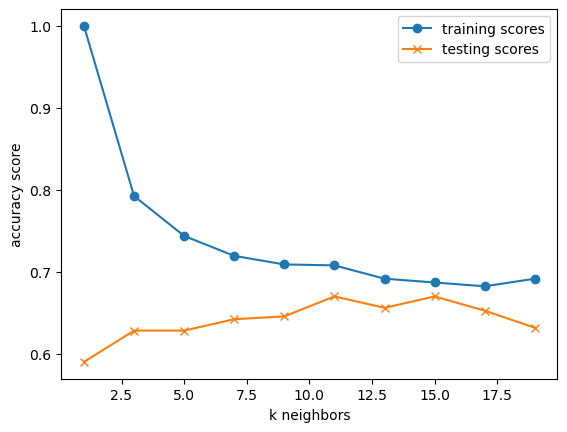

In [14]:
import matplotlib.pyplot as plt
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [15]:
# Create the KNN model with 11 neighbors
knn_model = KNeighborsClassifier(n_neighbors=11)

# Fit the model to the training data
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=11)

In [16]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {knn_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {knn_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.7079953650057937
Testing Data Score: 0.6701388888888888


## Model and Fit to a Decision Tree Classifier

In [17]:
# Create the decision tree classifier model
dt_model = DecisionTreeClassifier()

# Fit the model to the training data
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [18]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {dt_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {dt_model.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.6145833333333334


**Hyperparamter Tunning**

In [19]:
# Initialize the DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1)

# Define a grid of parameters to search over
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

# Setup GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate on the test set
best_dt = grid_search.best_estimator_
print("Training Data Score:", best_dt.score(X_train, y_train))
print("Testing Data Score:", best_dt.score(X_test, y_test))


Best parameters: {'ccp_alpha': 0.0, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Training Data Score: 0.7392815758980301
Testing Data Score: 0.6284722222222222


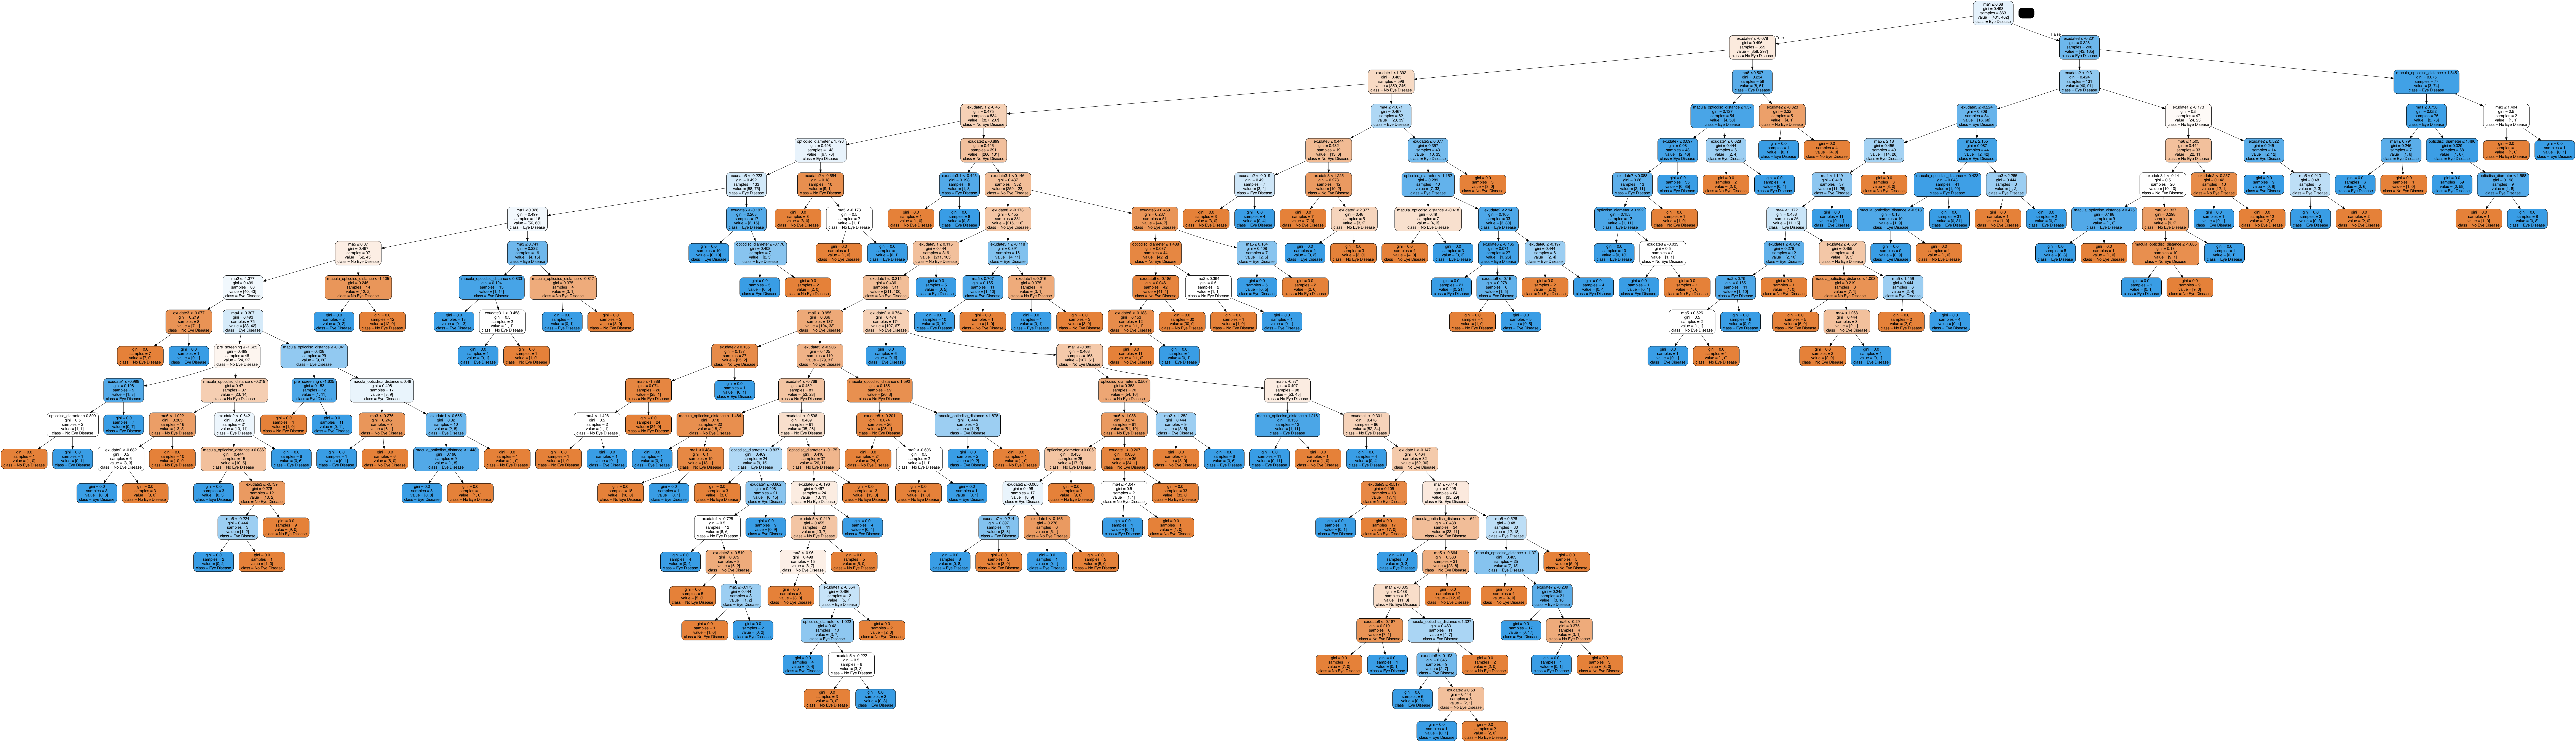

In [20]:
# Create a decision tree graph
dot_data = tree.export_graphviz(
    dt_model, out_file= None, 
    feature_names= X.columns,  
    class_names= ['No Eye Disease', 'Eye Disease'],
    filled=True, rounded=True,  
    special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('Diabetic Retinopathy.png')

# Show graph
Image(graph.create_png())

## Model and Fit to a Random Forest Classifier

In [21]:
# Create the random forest classifier model
# with n_estimators=128 and random_state=1
rf_model = RandomForestClassifier(n_estimators=128, random_state=1)

# Fit the model to the training data
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=128, random_state=1)

In [22]:
# Validate the model by checking the model accuracy with model.score
print(f"Training Data Score: {rf_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf_model.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.6597222222222222


**Hyperparamter Tunning** 

*The accuracy scores show signs of overfitting (perfect training score but significantly lower testing score). Tuning  the hyperparameters with GridSearchCV to find more optimal settings could improve model generalization.*

In [23]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 128, 150],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=1)

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator
best_rf = grid_search.best_estimator_

# Predict on the testing set
y_pred = best_rf.predict(X_test_scaled)

# Evaluate the model
print("Training Accuracy:", best_rf.score(X_train_scaled, y_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=128; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=128; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=128; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.2s
[CV] END m

Look at Feature Importance

In [24]:
# Get the feature importance array
feature_importances = rf_model.feature_importances_

In [25]:
# List the top 10 most important features
importances_sorted = sorted(zip(feature_importances, X.columns), reverse=True)
importances_sorted[:10]

[(0.09001025771063656, 'ma1'),
 (0.08709720130153766, 'exudate1'),
 (0.06929900067930424, 'exudate3.1'),
 (0.06923285943938864, 'exudate2'),
 (0.06834536856541285, 'exudate3'),
 (0.0648904288001885, 'macula_opticdisc_distance'),
 (0.06284240885919451, 'opticdisc_diameter'),
 (0.06283393761878754, 'ma2'),
 (0.06171427034375923, 'exudate7'),
 (0.05504920570413508, 'ma3')]

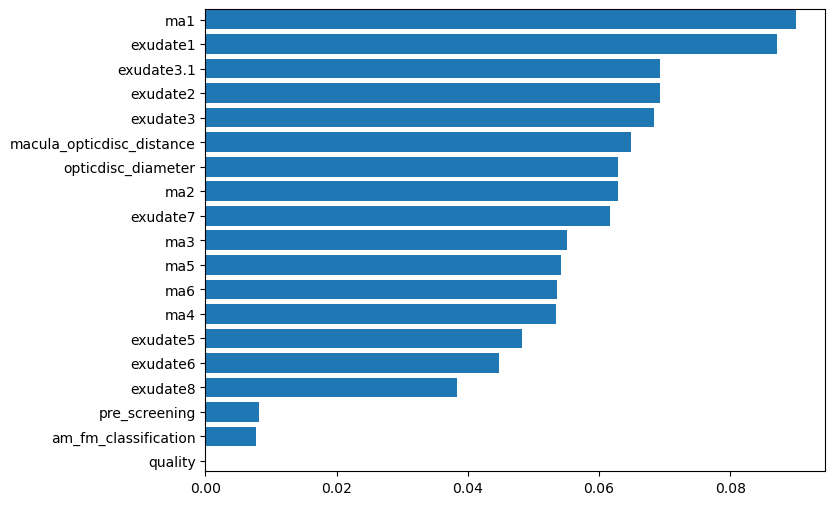

In [26]:
# Plot the feature importances
features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(8,6)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

## Model and Fit to a Gradient Boosting Classifier

In [27]:
# Train the Gradient Boosting classifier
clf = GradientBoostingClassifier(random_state=1).fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9003476245654692
Testing Score: 0.6840277777777778


**Hyperparamter Tunning** 

In [28]:
# Initialize the classifier
gbc = GradientBoostingClassifier(random_state=1)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]  # Subsample ratio of the training set
}

# Setup GridSearchCV
grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and scores
print("Best parameters:", grid_search.best_params_)
print("Training Score:", grid_search.best_estimator_.score(X_train, y_train))
print("Testing Score:", grid_search.best_estimator_.score(X_test, y_test))


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Training Score: 0.9837775202780996
Testing Score: 0.6805555555555556


## Model and Fit to an Adaptive Boosting Classifier

In [29]:
# Train the AdaBoostClassifier
clf = AdaBoostClassifier(random_state=1).fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.8088064889918888
Testing Score: 0.6319444444444444


## Model and Fit to a Naive Bayes Classifier

In [34]:
# Train the GaussianNB
gnb = GaussianNB().fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Score: {gnb.score(X_train_scaled, y_train)}')
print(f'Testing Score: {gnb.score(X_test_scaled, y_test)}')

# Make predictions on the testing set
y_pred = gnb.predict(X_test_scaled)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Training Score: 0.6338354577056778
Testing Score: 0.6319444444444444
Accuracy: 0.6319
